<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/logistic-regression/logistic_regression_customerpersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://raw.githubusercontent.com/fgith/data-science/main/datasets/marketing_campaign.csv"

--2022-04-21 08:47:20--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/marketing_campaign.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217947 (213K) [text/plain]
Saving to: ‘marketing_campaign.csv’

marketing_campaign. 100%[===================>] 212.84K  --.-KB/s    in 0.03s   

2022-04-21 08:47:20 (7.53 MB/s) - ‘marketing_campaign.csv’ saved [217947/217947]



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

**Load CSV Dataset**

In [2]:
dataset = pd.read_csv("marketing_campaign.csv",delimiter='\t')

In [3]:
df = pd.DataFrame(dataset)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# df.isnull().sum()
# df.info()
df.columns
# df.index
# df.values
# df.shape
# df.head()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
# Function to convert Year_Birth column to Age
from datetime import date
def age(birthyear):
  today = date.today()
  age = today.year - birthyear
  return age

In [5]:
# Add new column 'Age' to dataset
df['Age'] = age(df['Year_Birth'])

# Add new column Kids = Kidhome + Teenhome
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Add new column AmountSpent = Add ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')
df['AmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Add new column NoOfPurchases = Add ('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases')
df['NoOfPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,AmountSpent,NoOfPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,65,0,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,68,2,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,57,0,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,38,1,53,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,41,1,422,14


In [6]:
# Drop unwanted columns
df.drop(['Year_Birth','ID','Z_CostContact','Z_Revenue','Kidhome','Teenhome','MntWines', 
         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
        axis=1,inplace=True)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases
0,Graduation,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22
1,Graduation,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4
2,Graduation,Together,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20
3,Graduation,Together,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6
4,PhD,Married,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14


In [7]:
df['Marital_Status'].unique()
df['Education'].unique()

df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Divorced':'Couple',
                                                    'Alone':'Single','Widow':'Single','Alone':'Single',
                                                    'Absurd':'Single','YOLO':'Single'})

df['Education'] = df['Education'].replace({'Basic':'Basic','2n Cycle':'Basic', 
                                           'Master':'Graduation','PhD':'Doctorate'})

df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases
0,Graduation,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22
1,Graduation,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4
2,Graduation,Couple,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20
3,Graduation,Couple,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6
4,Doctorate,Couple,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14


In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
df['Education'] = df[['Education']].apply(label_encoder.fit_transform)

one_hot_encoder = OneHotEncoder()
df1 = one_hot_encoder.fit_transform(df[['Marital_Status']]).toarray()

encodings = pd.DataFrame(columns = one_hot_encoder.categories_, data = df1)

df = pd.concat([df,encodings] , axis=1)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,"(Couple,)","(Single,)"
0,2,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22,0.0,1.0
1,2,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4,0.0,1.0
2,2,Couple,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20,1.0,0.0
3,2,Couple,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6,1.0,0.0
4,1,Couple,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14,1.0,0.0


In [9]:
df = df.drop(['Marital_Status'],axis=1)

df.head()

,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,"(Couple,)","(Single,)"
0,2,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22,0.0,1.0
1,2,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4,0.0,1.0
2,2,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20,1.0,0.0
3,2,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6,1.0,0.0
4,1,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14,1.0,0.0


In [10]:
from datetime import date

today = date.today()
x = pd.to_datetime(today) - pd.to_datetime(df['Dt_Customer'])
df['Customer_Since'] = x.dt.days

df['AcceptedCmp_total'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [11]:
# Drop Dt_Customer
df.drop(['Dt_Customer','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], axis=1,inplace=True)
df.head()

,Education,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,"(Couple,)","(Single,)",Customer_Since,AcceptedCmp_total
0,2,58138.0,58,3,7,0,1,65,0,1617,22,0.0,1.0,3664,0
1,2,46344.0,38,2,5,0,0,68,2,27,4,0.0,1.0,2818,0
2,2,71613.0,26,1,4,0,0,57,0,776,20,1.0,0.0,3165,0
3,2,26646.0,26,2,6,0,0,38,1,53,6,1.0,0.0,2758,0
4,1,58293.0,94,5,5,0,0,41,1,422,14,1.0,0.0,3014,0


In [12]:
# Calculate duplicates
dups = df.duplicated()

# Print if there are any duplicates
print(dups.any()," No of duplicates: ",len(df[dups]), df.shape)

# Drop duplicate rows
df.drop_duplicates(inplace = True)

df.shape

True  No of duplicates:  184 (2240, 15)


(2056, 15)

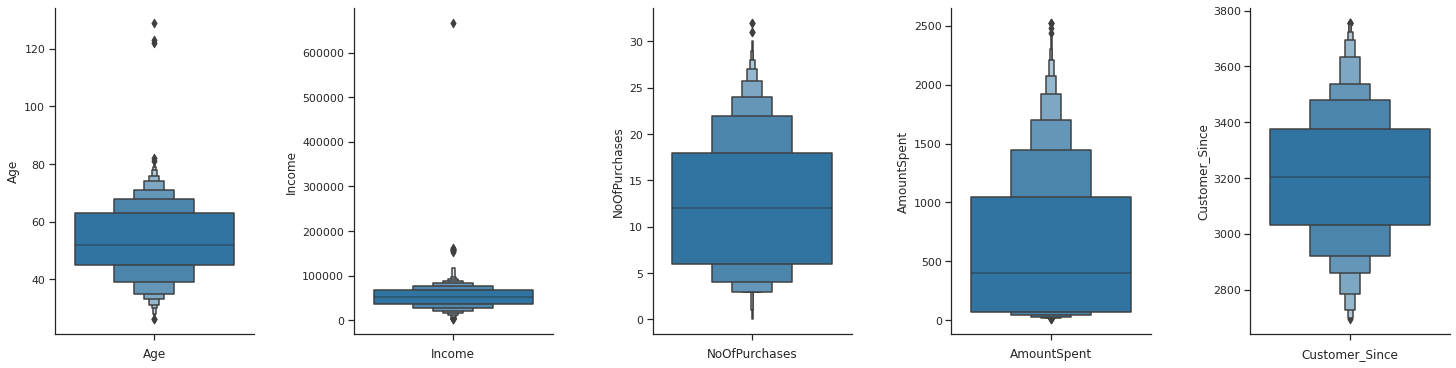

In [13]:
import seaborn as sns
sns.set_theme(style="ticks", palette="tab10")

cols = ['Age','Income','NoOfPurchases','AmountSpent','Customer_Since']

fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

fig.subplots_adjust(wspace=0.5)
sns.despine()


In [14]:
#Remove outliers

print("Number of customers above the age of 100= ", len(df[df["Age"]>100]))
print("Number of customers with income above 200,000= ", len(df[df["Income"]>200000]))

df['Age'] = df['Age'][df['Age']<100]
df['Income'] = df['Income'][df['Income']<200_000]

print("Number of customers above the age of 100= ", len(df[df["Age"]>100]))
print("Number of customers with income above 200,000= ", len(df[df["Income"]>200000]))

Number of customers above the age of 100=  3
Number of customers with income above 200,000=  1
Number of customers above the age of 100=  0
Number of customers with income above 200,000=  0


In [15]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='mean')
df['Income'] = impute.fit_transform(df['Income'].to_numpy().reshape(-1,1))
# df['Income'] = df['Income'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2056 non-null   int64  
 1   Income             2056 non-null   float64
 2   Recency            2056 non-null   int64  
 3   NumDealsPurchases  2056 non-null   int64  
 4   NumWebVisitsMonth  2056 non-null   int64  
 5   Complain           2056 non-null   int64  
 6   Response           2056 non-null   int64  
 7   Age                2053 non-null   float64
 8   Kids               2056 non-null   int64  
 9   AmountSpent        2056 non-null   int64  
 10  NoOfPurchases      2056 non-null   int64  
 11  (Couple,)          2056 non-null   float64
 12  (Single,)          2056 non-null   float64
 13  Customer_Since     2056 non-null   int64  
 14  AcceptedCmp_total  2056 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 257.0 KB


In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


,Education,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,"(Couple,)","(Single,)",Customer_Since,AcceptedCmp_total
0,0.649372,0.282934,0.310859,0.341336,0.68938,-0.099112,2.364264,1.018785,-1.275067,1.676033,1.317046,-1.709873,1.709873,1.979617,-0.443074
1,0.649372,-0.266644,-0.379342,-0.173548,-0.13038,-0.099112,-0.422965,1.276050,1.395883,-0.961380,-1.186870,-1.709873,1.709873,-1.663402,-0.443074
2,0.649372,0.910844,-0.793463,-0.688431,-0.54026,-0.099112,-0.422965,0.332745,-1.275067,0.281024,1.038833,0.584839,-0.584839,-0.169162,-0.443074
3,0.649372,-1.184534,-0.793463,-0.173548,0.27950,-0.099112,-0.422965,-1.296601,0.060408,-0.918252,-0.908658,0.584839,-0.584839,-1.921772,-0.443074
4,-0.797116,0.290157,1.553222,1.371103,-0.13038,-0.099112,-0.422965,-1.039336,0.060408,-0.306173,0.204194,0.584839,-0.584839,-0.819393,-0.443074


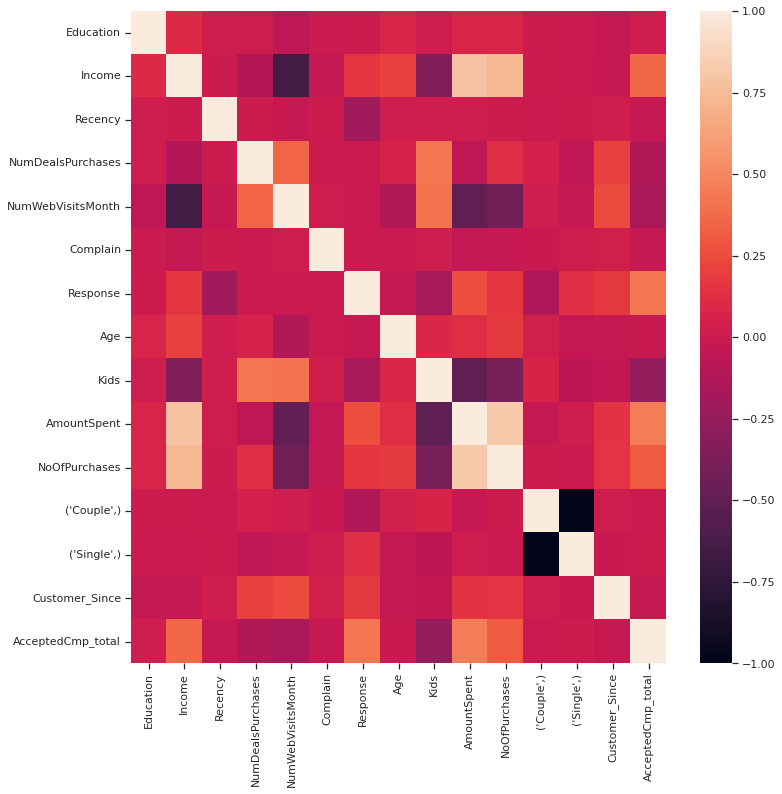

In [19]:
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(df.corr(), ax=ax)

In [21]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df, 0.85)
print(len(set(corr_features)), " ", corr_features)

1   {('Single',)}


**Assign X and y Data**

In [ ]:
X = df
y = X['Response']
X.shape,y.shape

((2240, 26), (2240,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.7)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))
print("Mean Squared Error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of Determination: %.2f" % r2_score(y_test,y_pred))

Accuracy: 1.00
Mean Squared Error: 0.00
Coefficient of Determination: 1.00
1.0
